# COVID-19 Death Rate Factors

### The data set was queried from 22th August 2021 report of CDC

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor

import warnings
import numpy as np
warnings.filterwarnings('ignore')

df = pd.read_csv('E:/University/UNT/Capstone/COVID/cap(no_time).csv')
df1 = pd.read_csv('E:/University/UNT/Capstone/COVID/capstone.csv')
age_group = df.groupby('age_group')


## Exploratory Data Analysis

In [2]:
print(df1.isnull().sum())
print(df.isnull().sum())
print (df1.shape)
print(df1.dtypes)
print(df1.describe())

year               0
month              0
states             0
condition          0
condition_group    0
age_group          0
deaths_rate        0
dtype: int64
age_group                                     0
Cardiac_arrhythmia                            0
Heart_failure                                 0
Hypertensive_diseases                         0
Cardiac_arrest                                0
Ischemic_heart_disease                        0
Cardiac_diseases_group                        0
Influenza_and_pneumonia                       0
COVID-19                                      0
Other_diseases_of_the_respiratory_system      0
Chronic_lower_respiratory_diseases            0
Respiratory_arrest                            0
Respiratory_failure                           0
Adult_respiratory_distress_syndrome           0
Respiratory_diseases_group                    0
Cerebrovascular_diseases                      0
Other_diseases_of_the_circulatory_system      0
Vascular                

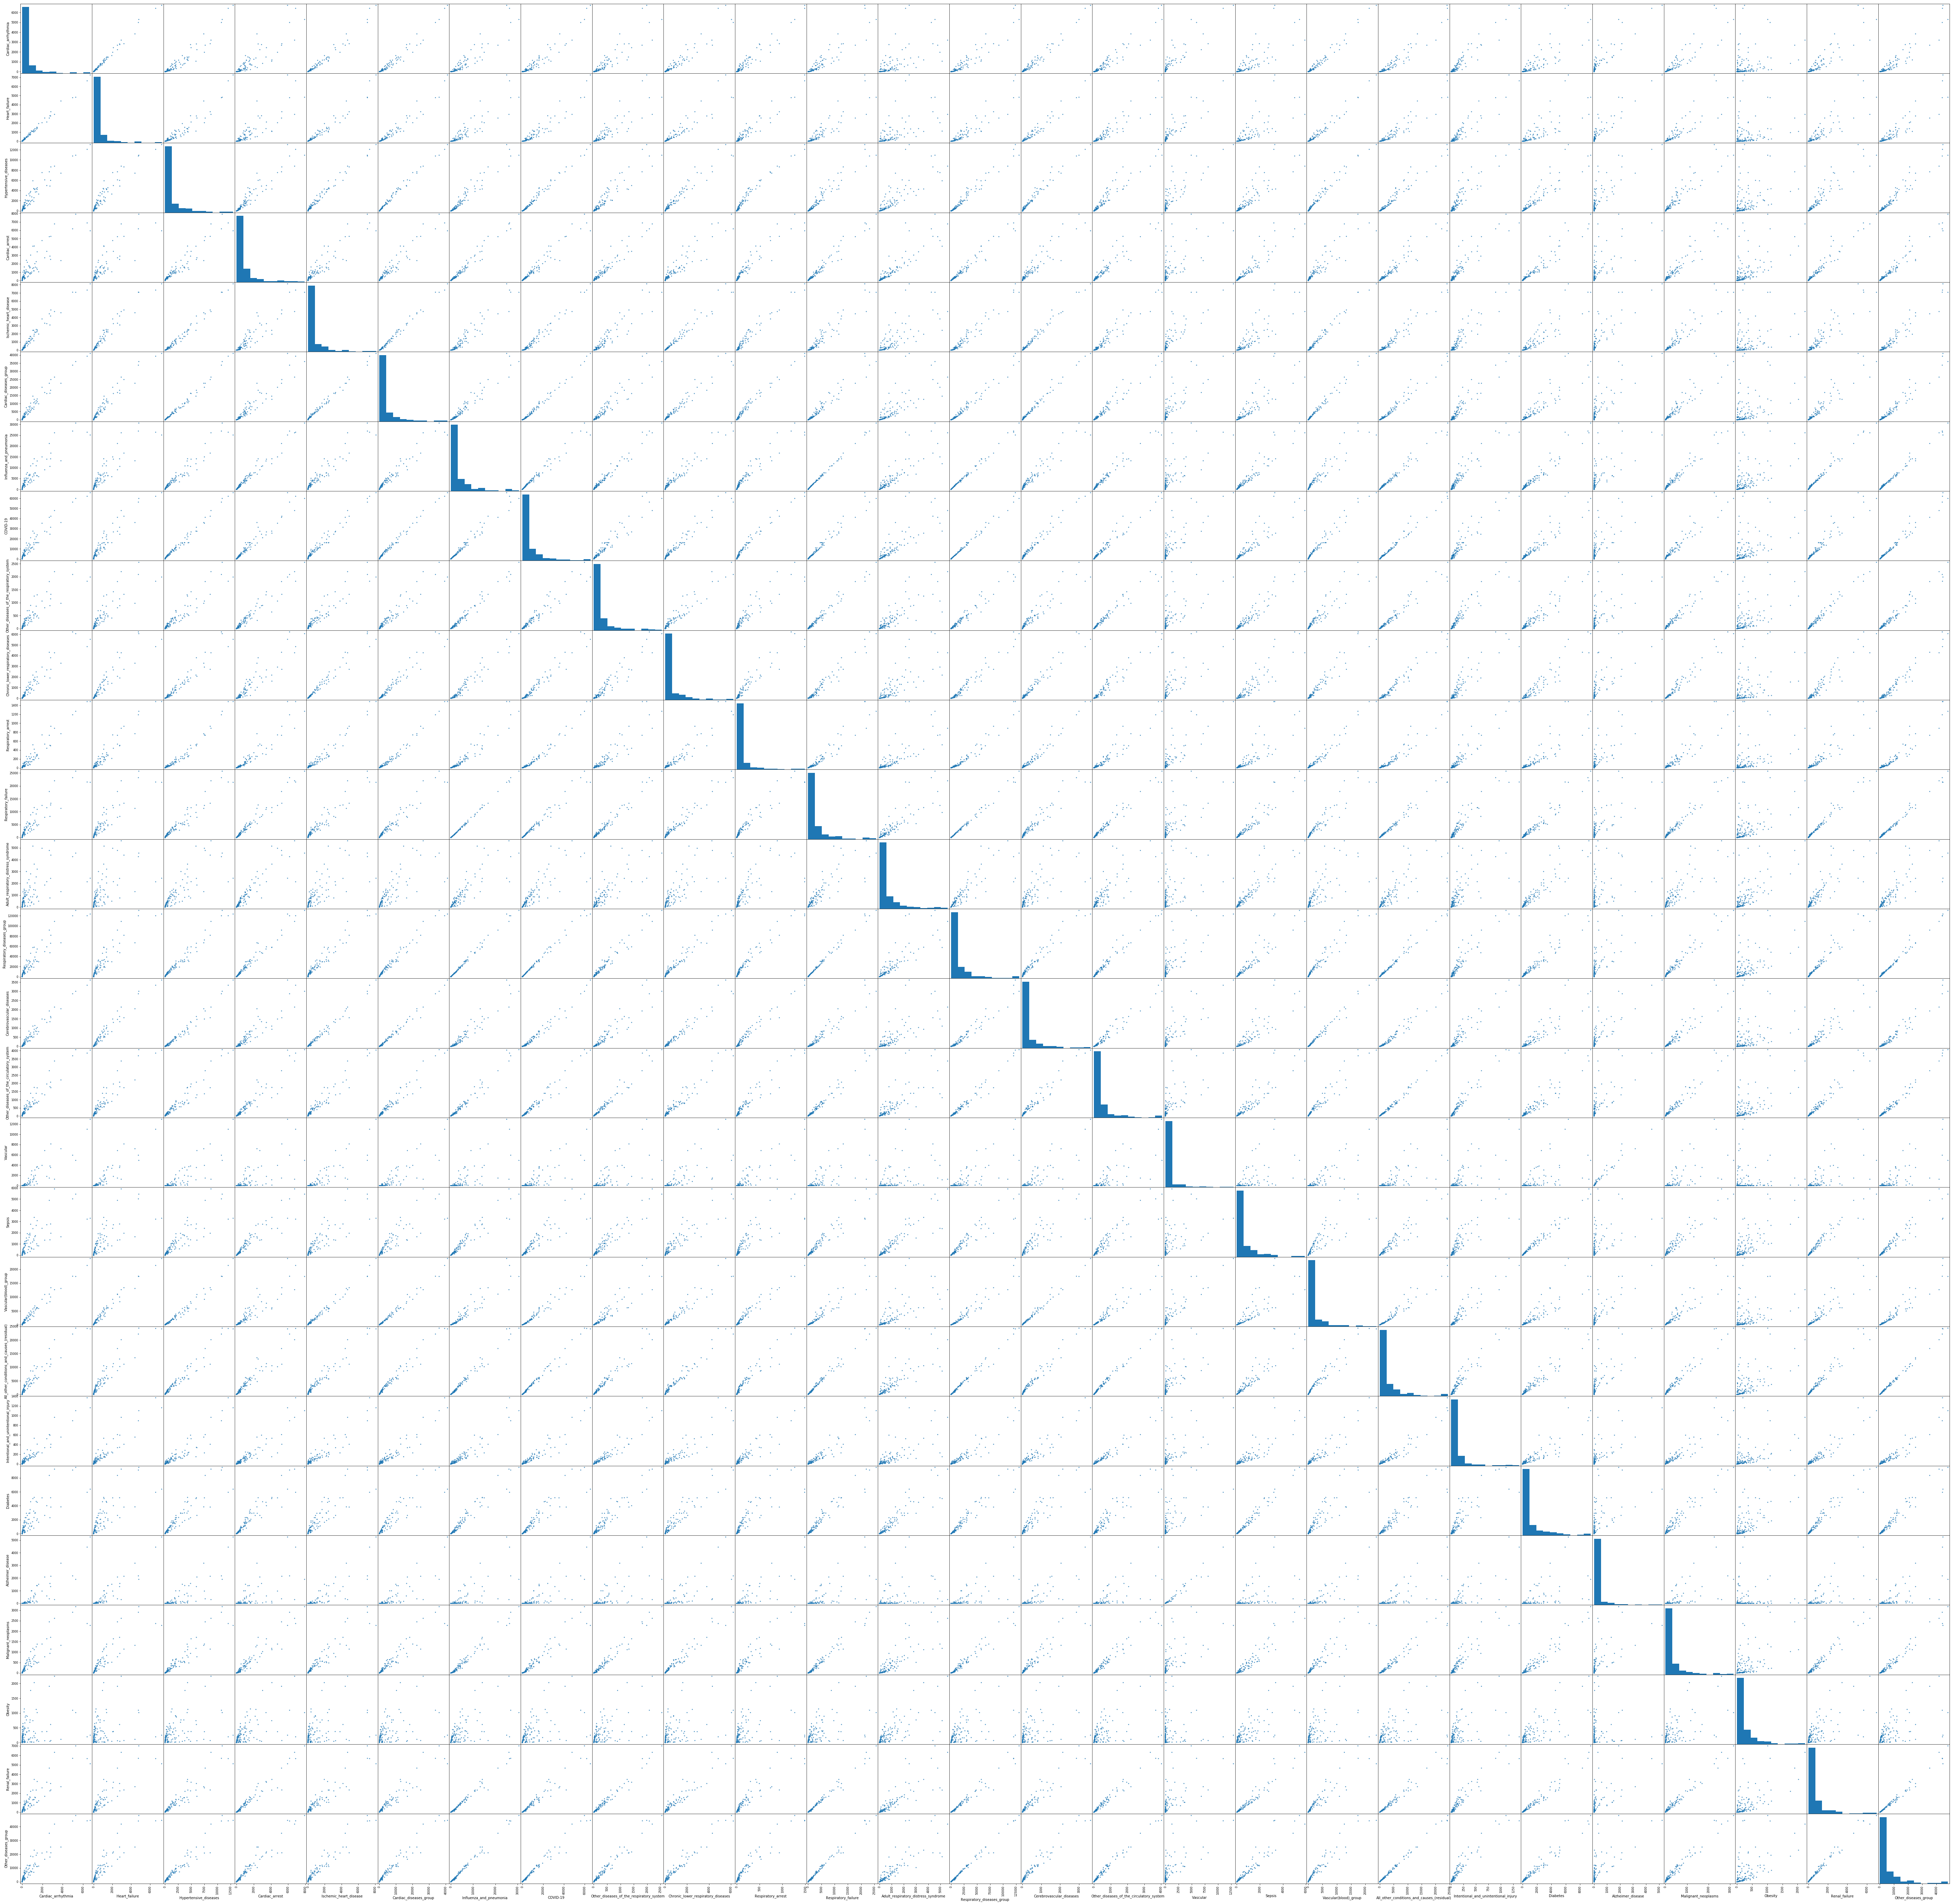

In [3]:
scatter_matrix(df, alpha=0.8, figsize=(100,100))
plt.show()

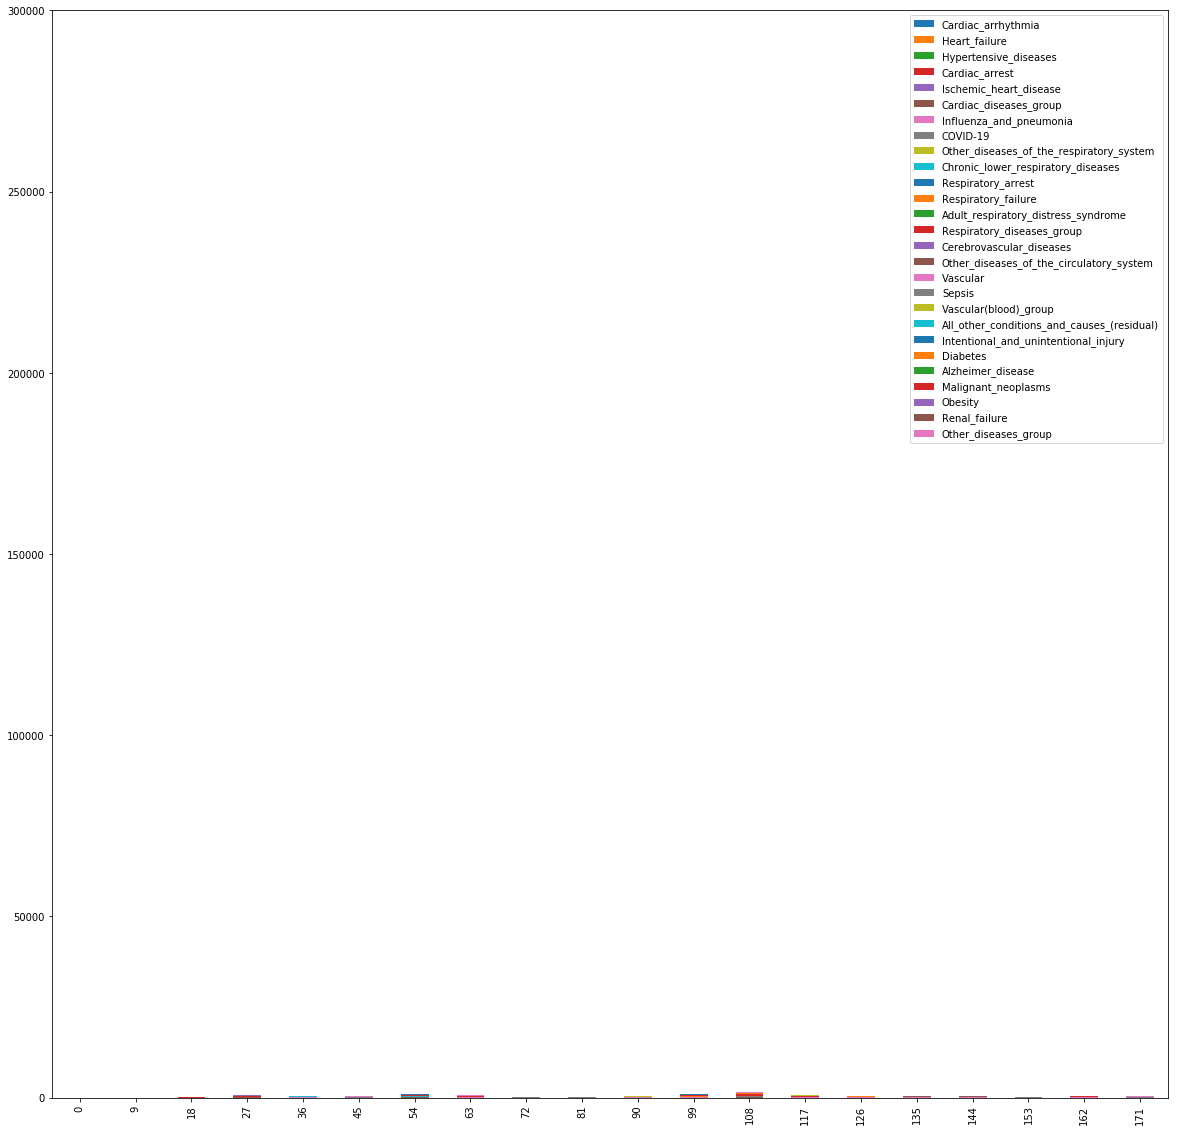

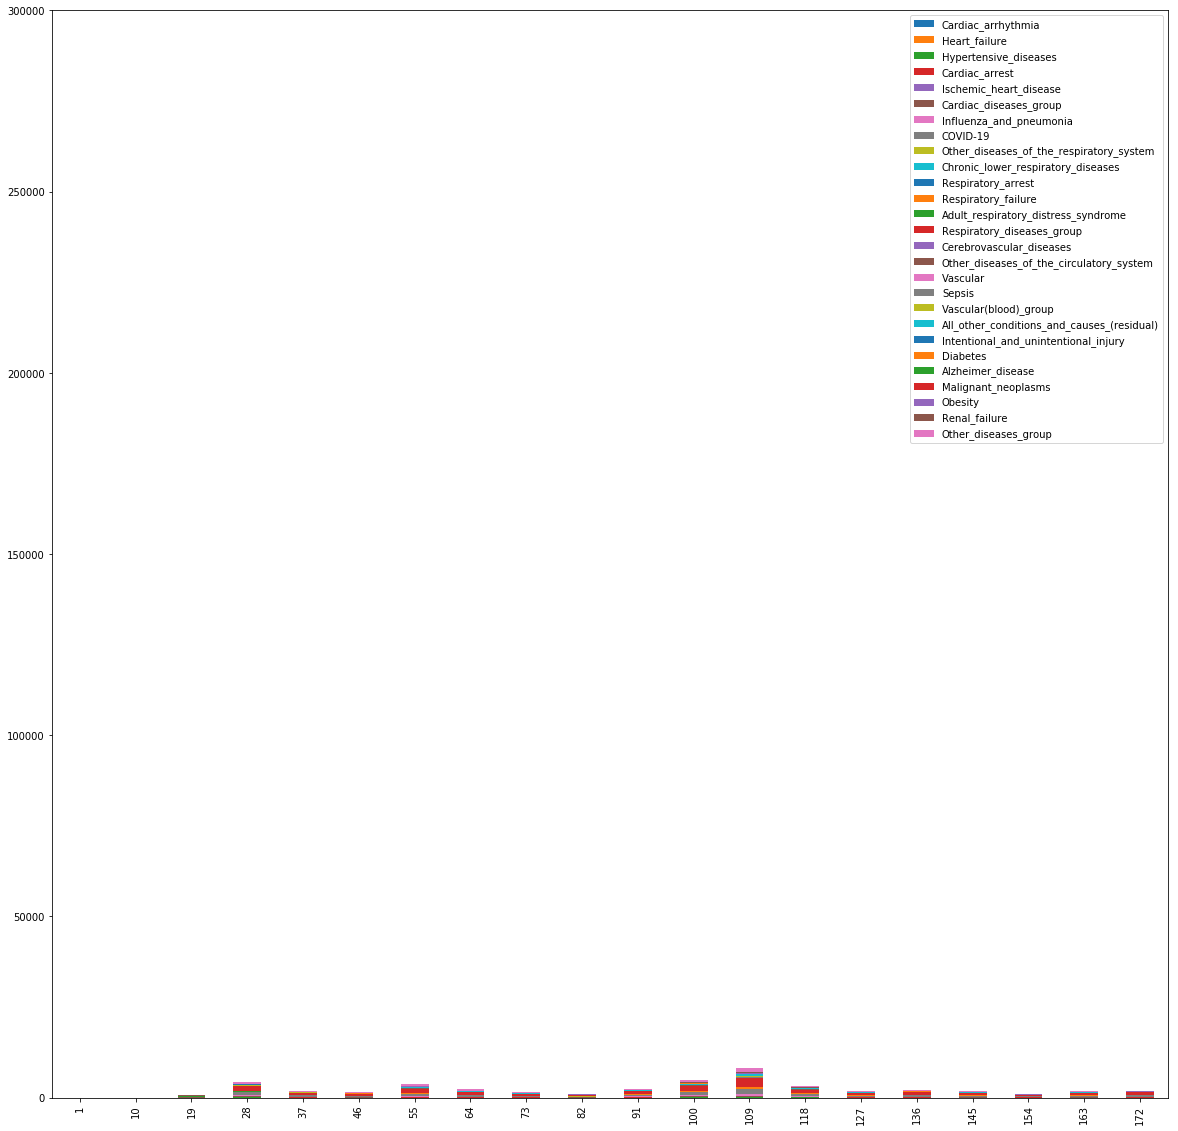

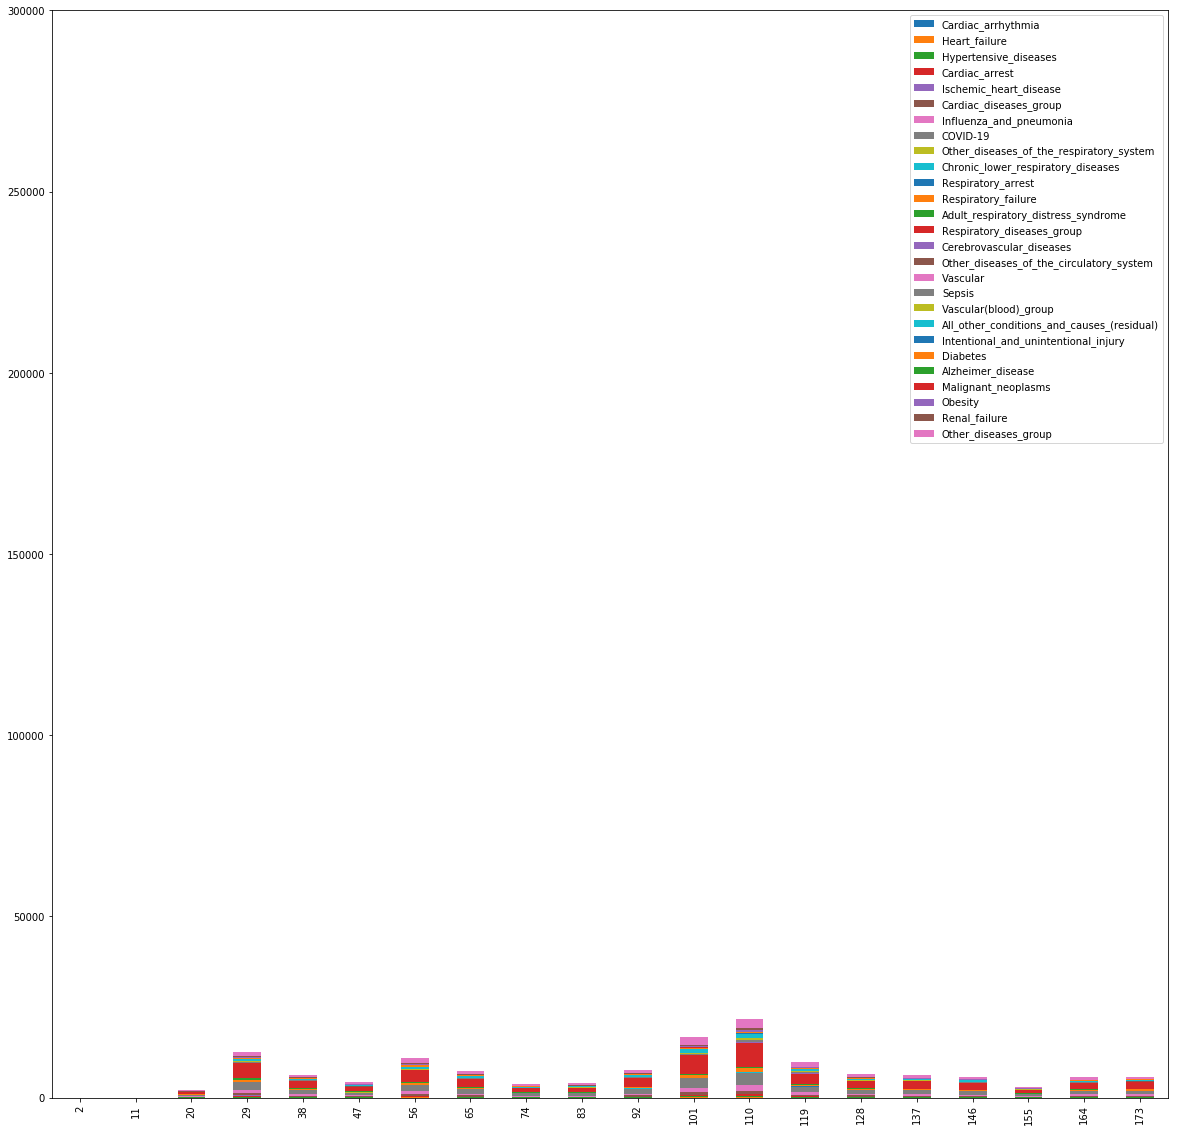

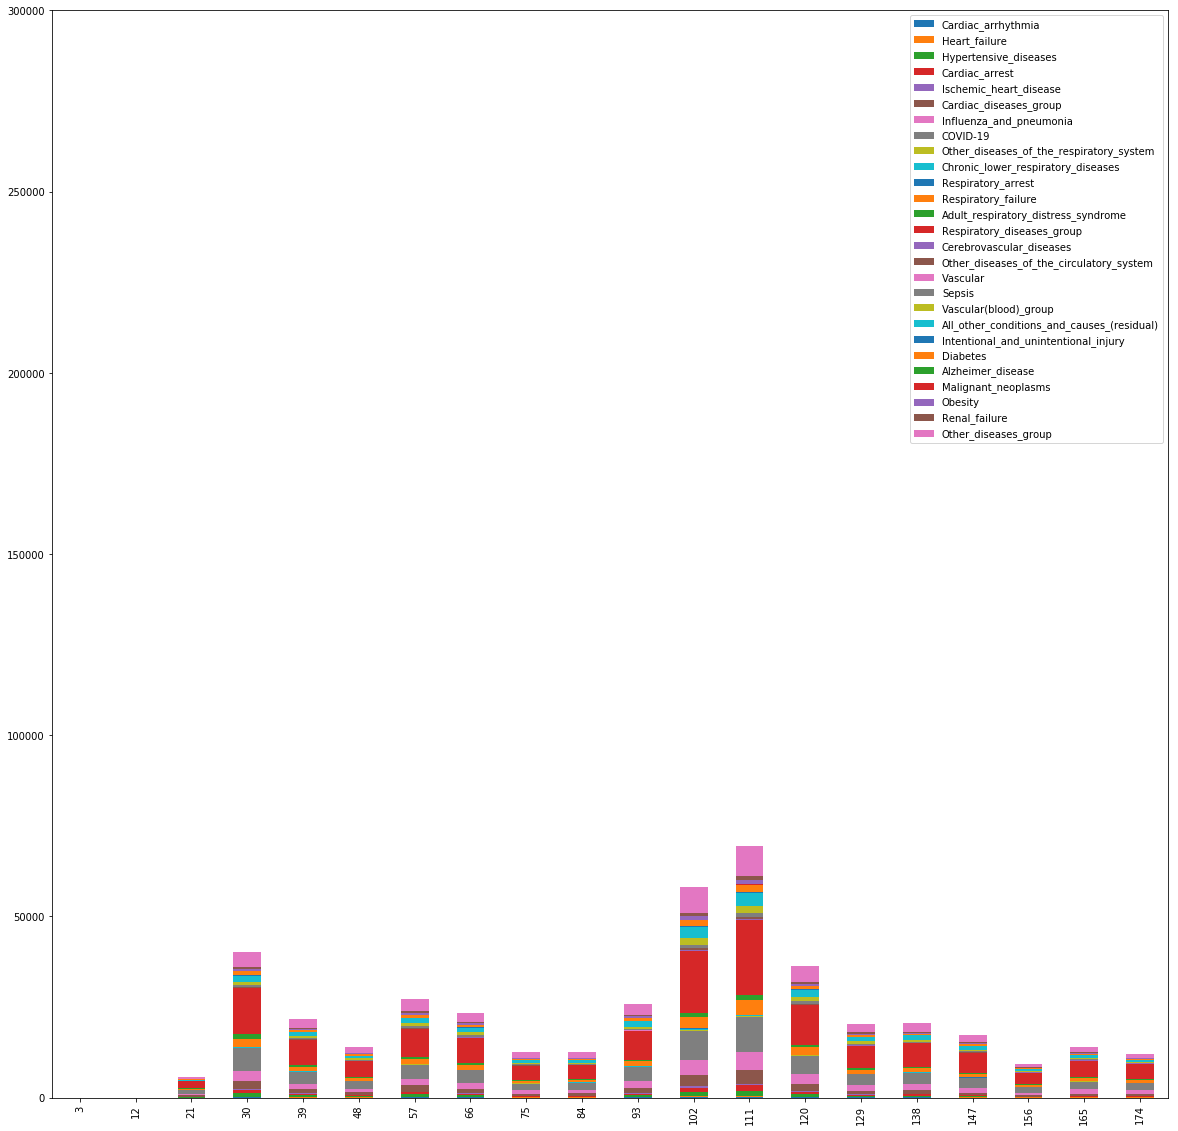

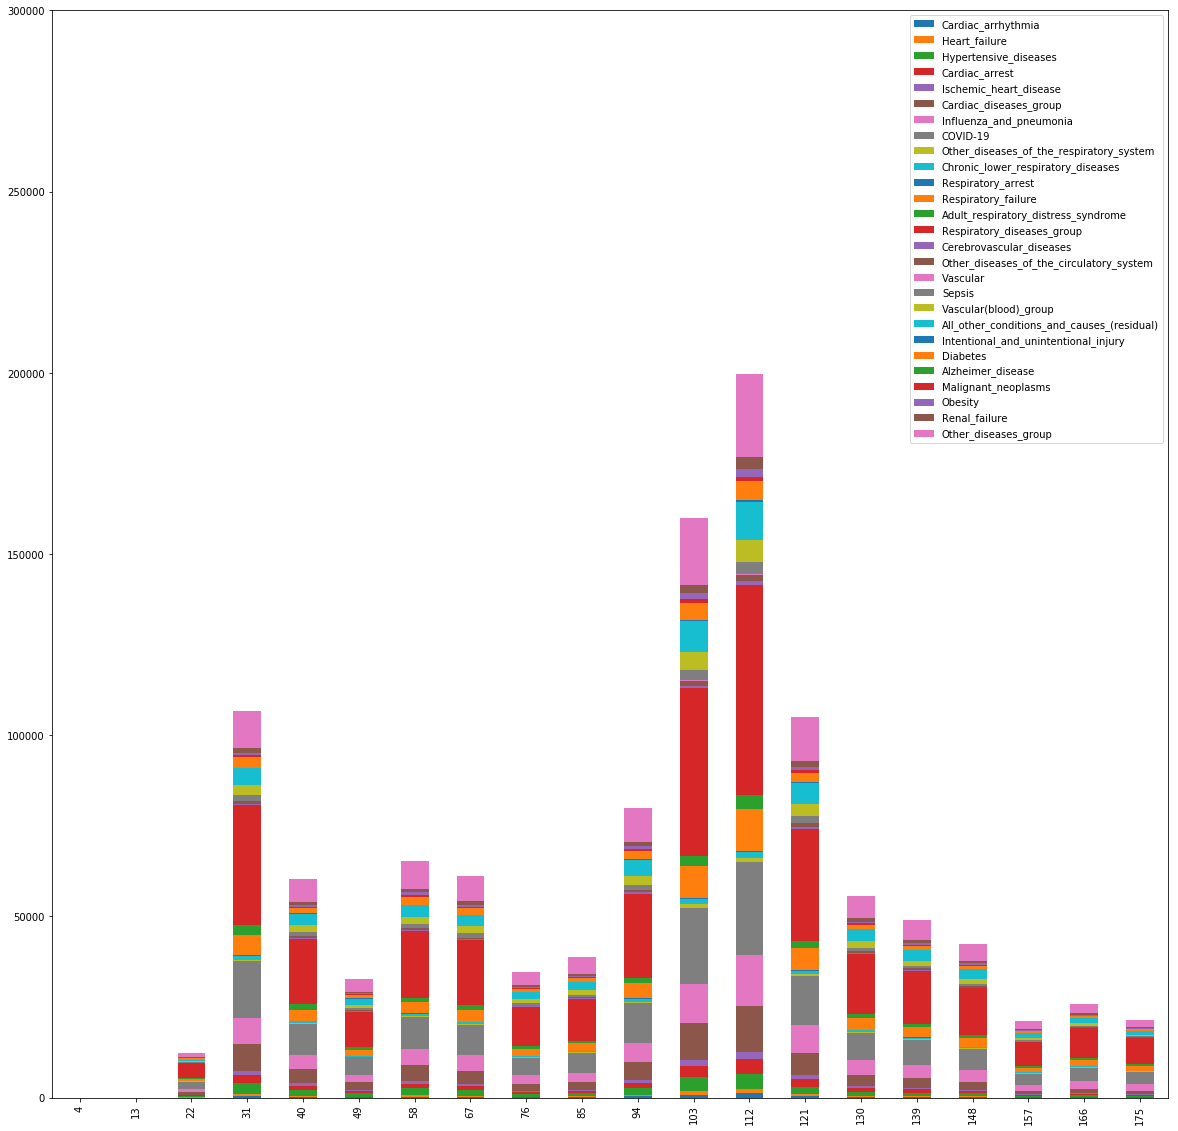

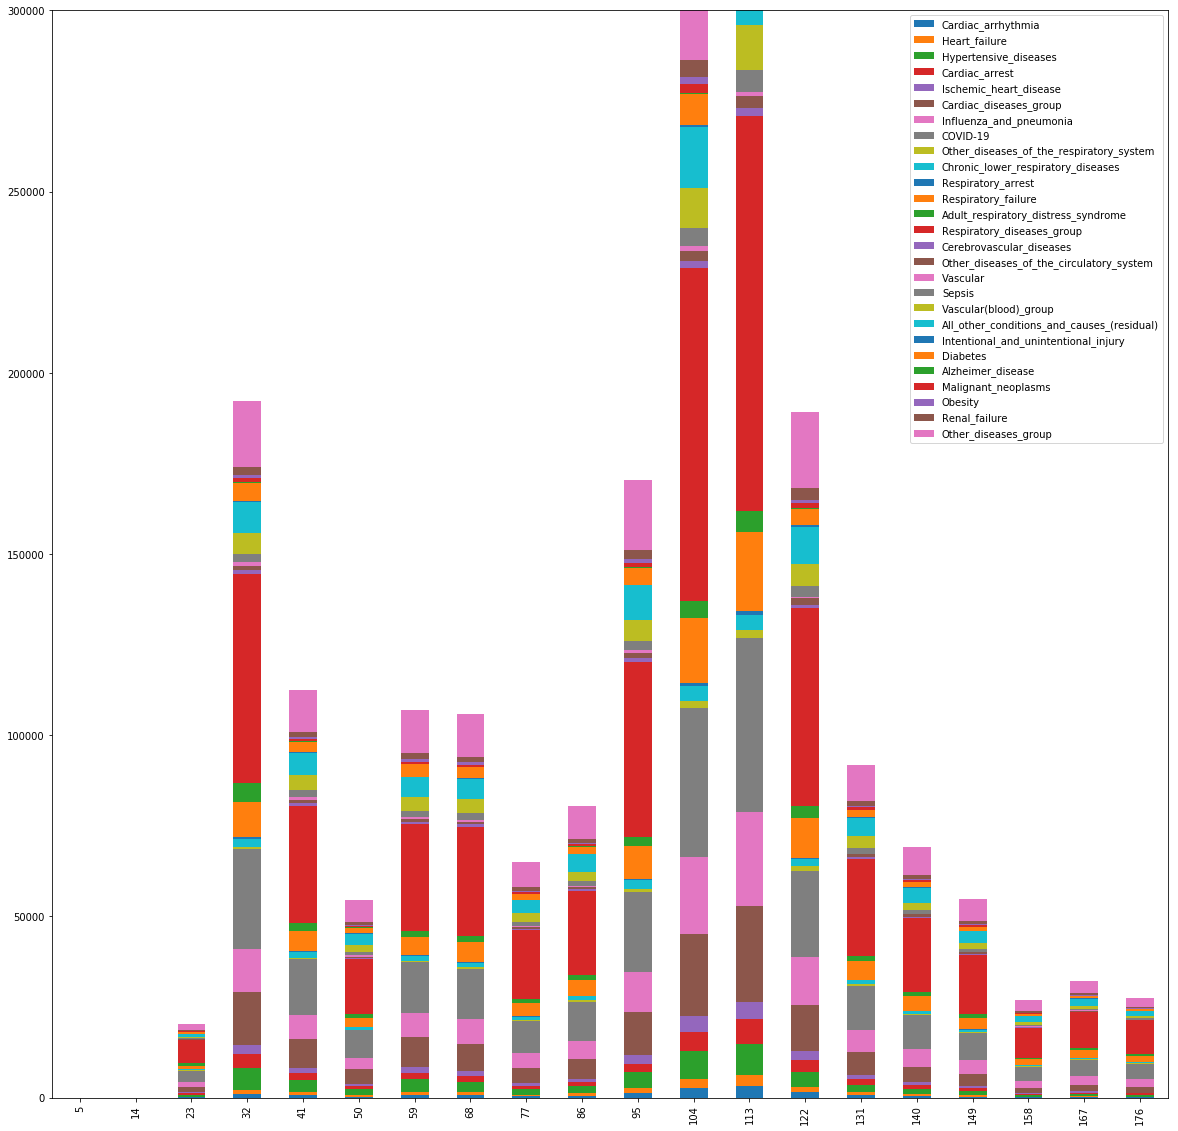

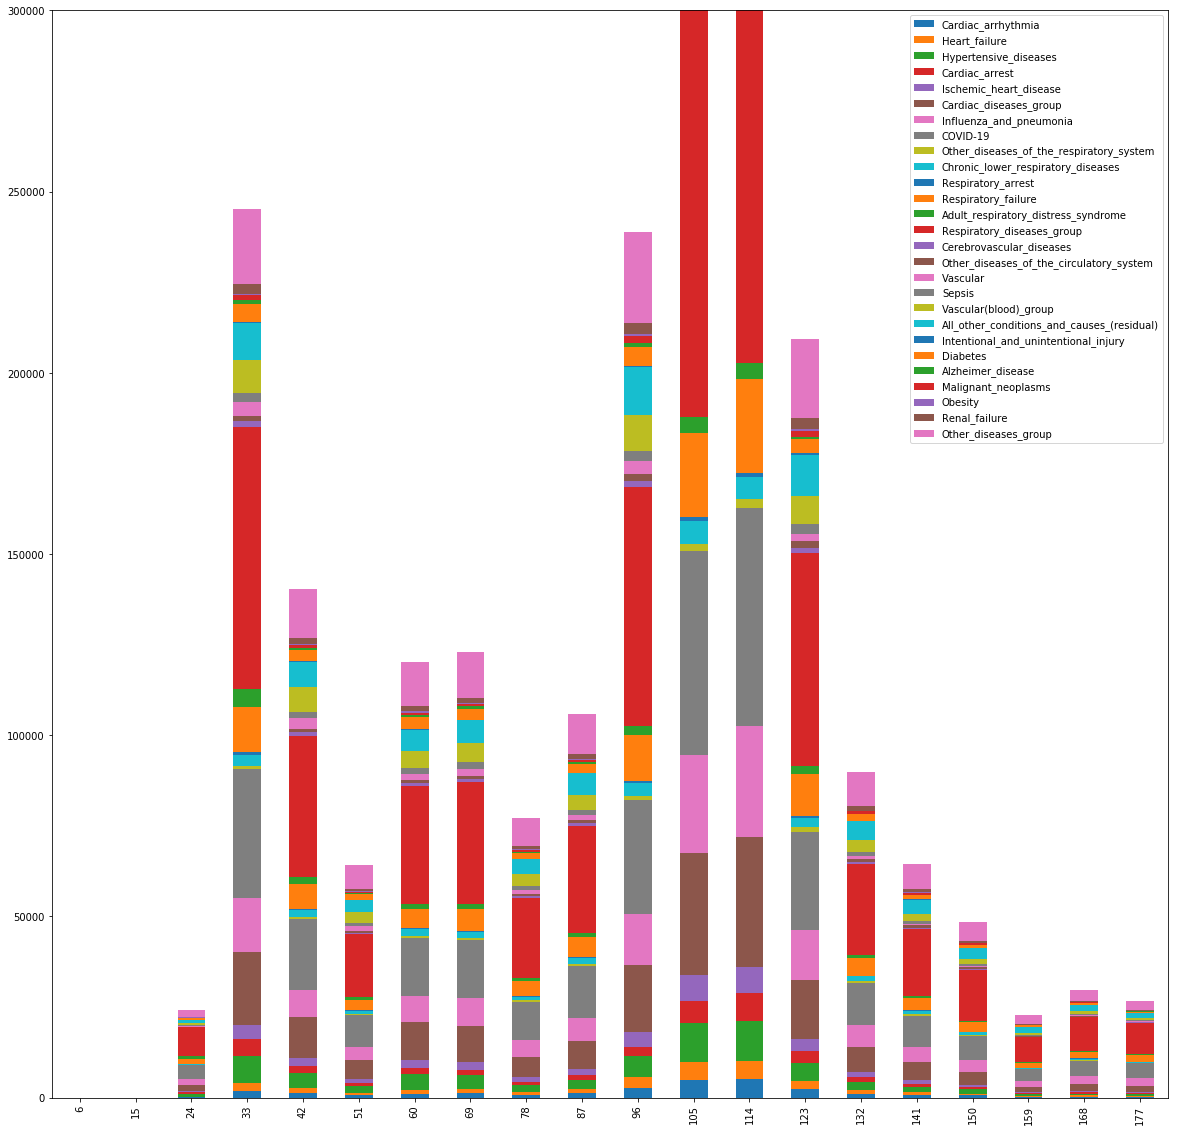

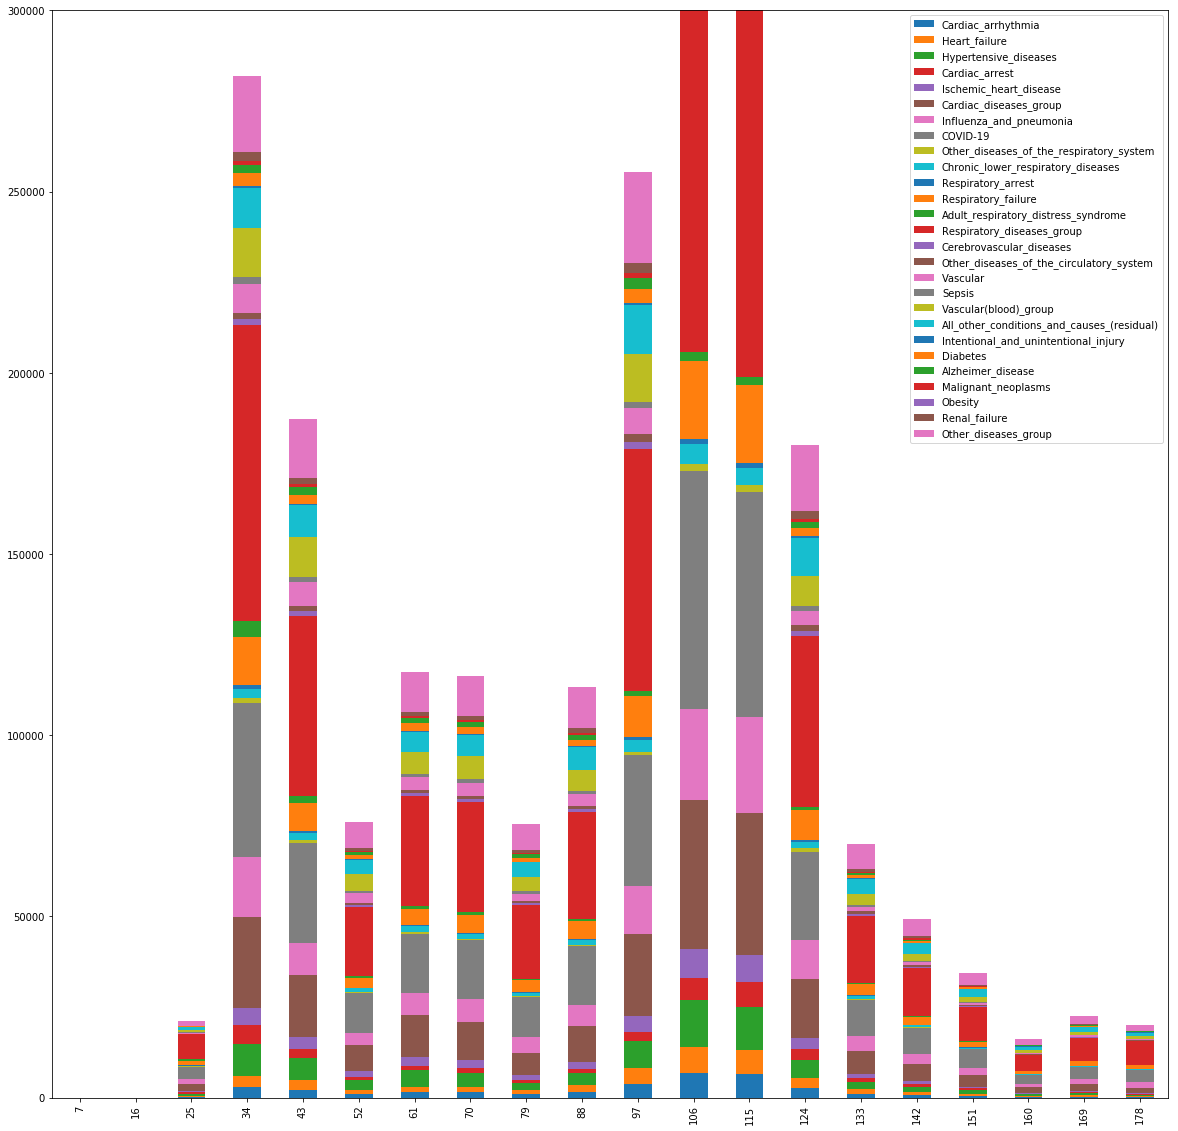

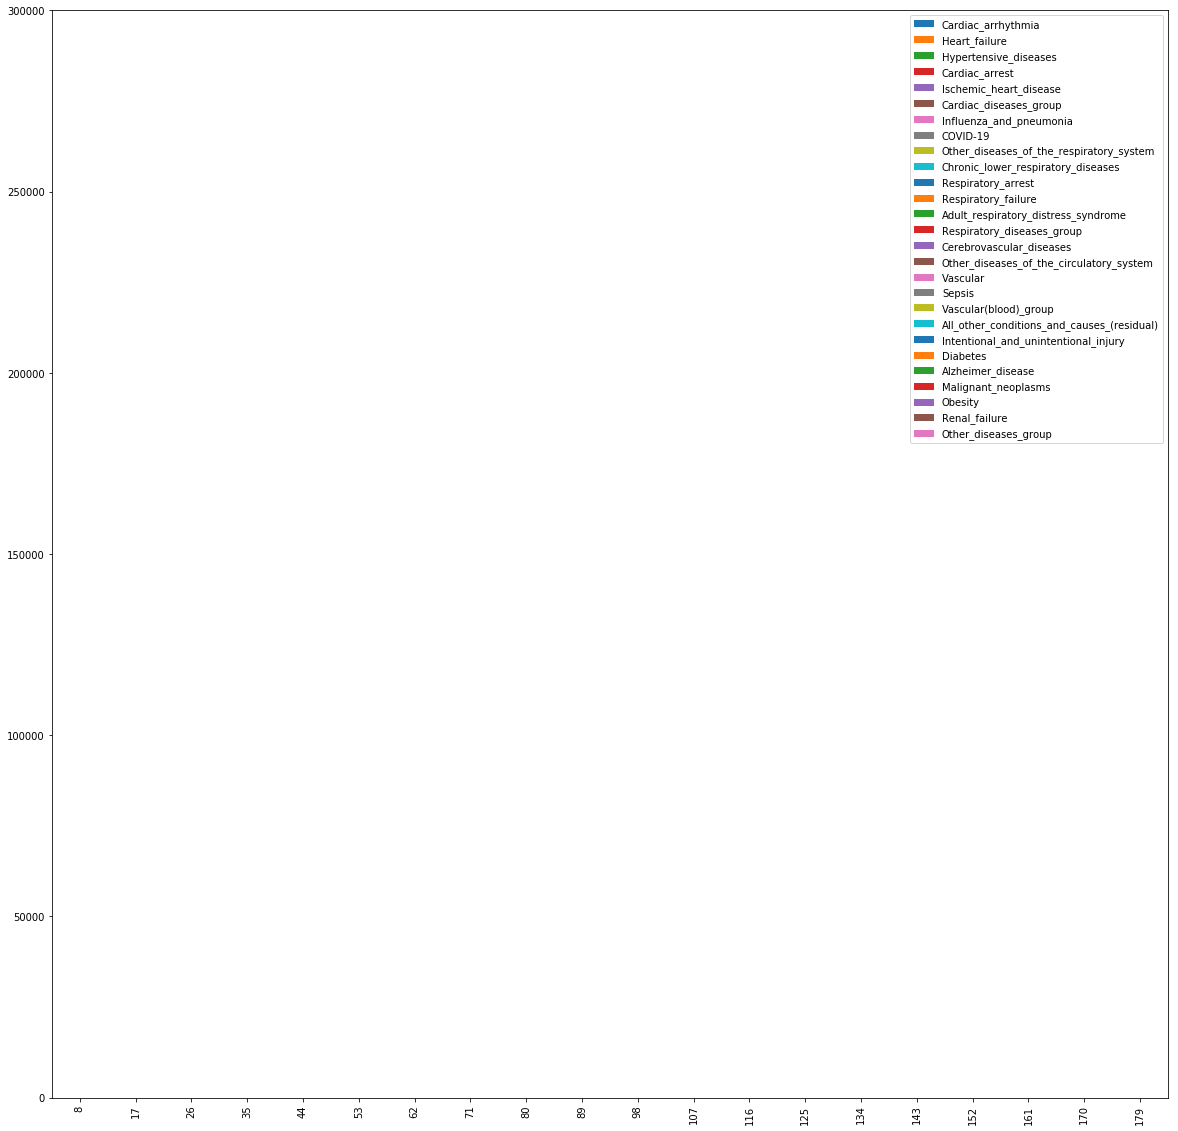

In [4]:
#EDA by age group
age_group.plot(kind='bar', stacked=True, layout=(20,2), figsize=(20,20), ylim=(0,300000))
plt.show()

In [5]:
df.corr()

Cardiac_arrhythmia  Heart_failure  \
Cardiac_arrhythmia                                    1.000000       0.995775   
Heart_failure                                         0.995775       1.000000   
Hypertensive_diseases                                 0.959315       0.954681   
Cardiac_arrest                                        0.897920       0.879769   
Ischemic_heart_disease                                0.983365       0.976418   
Cardiac_diseases_group                                0.979983       0.973550   
Influenza_and_pneumonia                               0.931561       0.912308   
COVID-19                                              0.961630       0.953689   
Other_diseases_of_the_respiratory_system              0.916475       0.892785   
Chronic_lower_respiratory_diseases                    0.955395       0.939132   
Respiratory_arrest                                    0.974319       0.970017   
Respiratory_failure                                   0.933729       0.914248   
Adult_respiratory_distress_syndrome                   0.690438       0.671114   
Respiratory_diseases_group                            0.945956       0.932166   
Cerebrovascular_diseases                              0.984759       0.978764   
Other_diseases_of_the_circulatory_system              0.962991       0.946912   
Vascular                                              0.908993       0.934317   
Sepsis                                                0.813364       0.783463   
Vascular(blood)_group                                 0.985739       0.985286   
All_other_conditions_and_causes_(residual)            0.960246       0.945994   
Intentional_and_unintentional_injury                  0.959676       0.944625   
Diabetes                                              0.847659       0.822525   
Alzheimer_disease                                     0.905936       0.931933   
Malignant_neoplasms                                   0.918087       0.892935   
Obesity                                               0.369015       0.336864   
Renal_failure                                         0.912849       0.887582   
Other_diseases_group                                  0.942526       0.925605   

                                            Hypertensive_diseases  \
Cardiac_arrhythmia                                       0.959315   
Heart_failure                                            0.954681   
Hypertensive_diseases                                    1.000000   
Cardiac_arrest                                           0.960260   
Ischemic_heart_disease                                   0.990456   
Cardiac_diseases_group                                   0.994903   
Influenza_and_pneumonia                                  0.972024   
COVID-19                                                 0.993957   
Other_diseases_of_the_respiratory_system                 0.948869   
Chronic_lower_respiratory_diseases                       0.975440   
Respiratory_arrest                                       0.979263   
Respiratory_failure                                      0.970619   
Adult_respiratory_distress_syndrome                      0.846763   
Respiratory_diseases_group                               0.985890   
Cerebrovascular_diseases                                 0.986362   
Other_diseases_of_the_circulatory_system                 0.965957   
Vascular                                                 0.861048   
Sepsis                                                   0.897103   
Vascular(blood)_group                                    0.987030   
All_other_conditions_and_causes_(residual)               0.978479   
Intentional_and_unintentional_injury                     0.929990   
Diabetes                                                 0.933220   
Alzheimer_disease                                        0.826470   
Malignant_neoplasms                                      0.949093   
Obesity                                           

### Separate the dataset into the input and output NumPy arrays

In [6]:
array = df1.values
X = array[:, 0:5]
Y = array[:, 6]

In [7]:
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state=seed)
print(X_train,Y_train)

[[2020    4   12    4    8]
 [2020    1   37    5    9]
 [2020    5   40    3   11]
 ...
 [2020    3    4    5    9]
 [2020    3   17   12   23]
 [2020    6   21    9   19]] [  0   0 282 ...   0   0   0]


### Build and train the KNN model

In [24]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)
R_sqaured = model.score(X_test, Y_test)
print(R_sqaured)

              precision    recall  f1-score   support

           0       0.79      0.98      0.88     24341
          10       0.01      0.00      0.00       407
          11       0.00      0.00      0.00       333
          12       0.00      0.00      0.00       305
          13       0.02      0.00      0.01       274
          14       0.00      0.00      0.00       261
          15       0.00      0.00      0.00       216
          16       0.00      0.00      0.00       207
          17       0.00      0.00      0.00       209
          18       0.00      0.00      0.00       187
          19       0.00      0.00      0.00       159
          20       0.03      0.01      0.01       163
          21       0.00      0.00      0.00       135
          22       0.00      0.00      0.00       129
          23       0.00      0.00      0.00       118
          24       0.00      0.00      0.00       137
          25       0.00      0.00      0.00        98
          26       0.00    

0.7689090499630022


### Build and train the  DecisionTreeRegressor model

In [25]:
model = DecisionTreeRegressor(random_state=seed)
model.fit(X_train, Y_train)
DecisionTreeRegressor(criterion='mse',splitter='best', max_depth=None, max_features=None,
                      max_leaf_nodes = None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, 
                      min_weight_fraction_leaf=0.0, 
                      presort=False, 
                      random_state = seed)
R_sqaured = model.score(X_test, Y_test)
print(R_sqaured)

0.33569155083636937


Evaluate

In [10]:
num_folds= 10
seed=7
kfold = KFold(n_splits=num_folds, random_state=seed)
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Average of all results from the K-fold Cross Validation:", results.mean())

Average of all results from the K-fold Cross Validation: -6383.380714040134


### Build and train the DecisionTreeRegressor model